<a href="https://colab.research.google.com/github/anishahossain/C_Projects/blob/main/firstai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINST dataset AI model

Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Ensures that plots are displayed inline within Notebooks.
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Components from Keras for constructing neural network models.
from sklearn.metrics import confusion_matrix #for evaluating classification models.
import seaborn as sns # A library for making statistical graphics.

np.random.seed(0) #so that we have same results even though data is random
# to ensure reproducibility of results.



In [ ]:
# shift enter to run code (shortcut)

Data Peparation

In [ ]:
from keras.datasets import mnist
# splitting it into training and testing sets after loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
#shows us how much we have

# for eg 60000 28x28 px size training images , 10000 testing images

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize examples

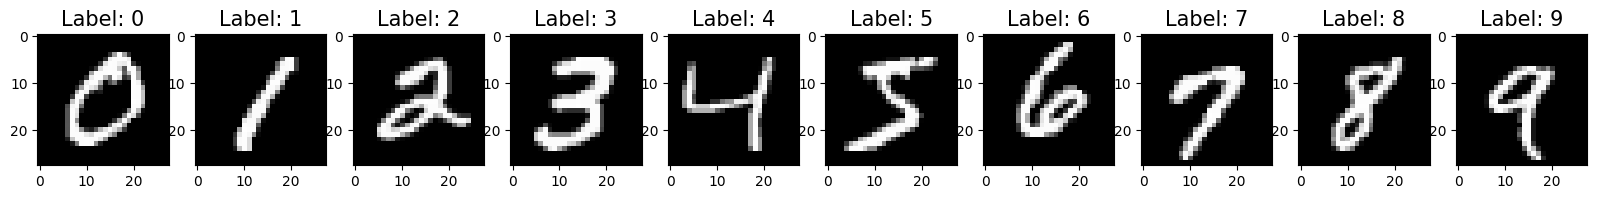

In [ ]:
num_class = 10
f, ax = plt.subplots(1, num_class, figsize=(20,20)) #row num, column, figure size
#grid of subplots
for i in range(0, num_class):
  sample = x_train[y_train == i][0] #we take first image - selects all training images with labe 'i' first image
  ax[i].imshow(sample, cmap='gray') #selects 'i'th subplot displays image in greyscale
  ax[i].set_title("Label: {}".format(i), fontsize=15)



In [ ]:
for i in range(10):
  print(y_train[i])

#we need to classify our numbers so that if a digit looks between two numbers we do not get a decimal

5
0
4
1
9
2
1
3
1
4


In [ ]:
#classifying
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)
#to_categorical: Converts class vectors (integers representing digits) into one-hot encoded vectors.

for i in range(10):
  print(y_train[i])
# the number is represented by 1 in the vector (its place)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Prepare data

In [ ]:
#preparing data is important as we need to normalise data before feeding into network
#in this case the data is rgb images

#Normalization: The pixel values in the MNIST dataset range from 0 to 255. Dividing by 255.0 scales the pixel values to the range [0, 1].

x_train = x_train / 255.0
x_test = x_test / 255.0

#reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
#flattening the images - reshaped into a 1D vector with 784 elements

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Create model - fully connected neural network

In [ ]:
model = Sequential()
#we can keep adding layer after layer using sequential - layers added linearly

model.add(Dense(units =128, input_shape = (784, ), activation='relu'))
# dense: each neuron (fuly connected) to every neuron
#units specify how mny neurons in layer
# The input layer expects vectors of length 784 (flattened images) (input shape)

model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25)) #means that only 25% of our data will be usd for training model
#Dropout only affects the training process by randomly dropping neurons.

model.add(Dense(units = 10, activation='softmax'))
#This layer outputs 10 values, corresponding to the 10 digit classes (0-9).

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# we use this loss when we deal with classes
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Layer (type): This column lists the different layers in your model. In your case, you have three Dense layers and one Dropout layer.
Output Shape: This column shows the shape of the data as it moves through each layer. The shape (None, 128) means that the output has 128 units (neurons), and None indicates that the batch size can vary.
Param #: This column indicates the number of parameters (weights and biases) in each layer that the model will learn during training.

In [ ]:
#train

batch_size = 512 # 512 images imported into network at a single time
epochs = 10
model.fit(x =x_train, y = y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6892 - loss: 1.0496
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9280 - loss: 0.2504
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9489 - loss: 0.1757
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9595 - loss: 0.1375
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9675 - loss: 0.1079
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9725 - loss: 0.0935
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9781 - loss: 0.0765
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9795 - loss: 0.0686
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9833 - loss: 0.0565
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9854 - loss: 0.0489


In [ ]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {},Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0830
Test Loss: 0.07235310226678848,Test Accuracy: 0.9771999716758728


In [ ]:
y_prediction = model.predict(x_test)
y_prediction_classes = np.argmax(y_prediction, axis=1)
print(y_prediction)
print(y_prediction_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[3.3699195e-07 7.6214235e-07 2.3817292e-05 ... 9.9981403e-01
  7.4940823e-07 1.5939717e-05]
 [4.6036902e-07 5.4157764e-04 9.9936754e-01 ... 1.9506751e-07
  4.5073616e-06 9.8421848e-10]
 [2.6578532e-06 9.9698895e-01 1.8626417e-04 ... 2.3801727e-03
  2.0967043e-04 2.0354006e-05]
 ...
 [1.5716795e-10 3.9185934e-09 5.8549660e-10 ... 9.8369708e-07
  2.7943568e-07 7.9212376e-05]
 [9.7367858e-10 2.6005363e-08 6.5649319e-10 ... 1.2335366e-08
  4.4855919e-06 8.7248347e-10]
 [7.2130293e-09 5.4096349e-11 7.7815070e-09 ... 1.0650395e-11
  1.0604559e-08 7.5963308e-10]]
[7 2 1 ... 4 5 6]


trained model is used to predict the output for the test dataset (x_test).
y_prediction: This variable will contain the predicted probabilities for each class (digits 0-9) for each test image.
The output will be a 2D array (matrix) where each row corresponds to a test image, and each column corresponds to the predicted probability for one of the 10 classes (digits 0 - 9).
For example, y_prediction[0] might look like [0.1, 0.2, 0.05, 0.15, 0.05, 0.1, 0.1, 0.05, 0.15, 0.05], which means that the model thinks there is a 10% chance the first image is a 0, a 20% chance it's a 1, and so on.


np.argmax: This function finds the index of the maximum value along a specified axis.
axis=1: This tells argmax to look along the second axis (columns) for each row in y_prediction thus finds higest probability of digit image

This index corresponds to the predicted digit.
y_prediction_classes: This will contain the predicted digit class (0-9) for each test image.
For example, if the highest probability in y_prediction[0] is at index 1, then y_prediction_classes[0] will be 1, meaning the model predicts that the first test image is of the digit 1.

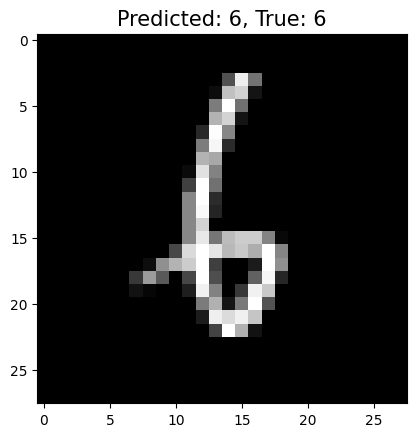

In [ ]:
#example prediction
#The code randomly picks a test image, retrieves its true label and the model's predicted label, and then displays the image along with this information.
random_index = np.random.choice(len(x_test)) #randomly selects  a test image index
x_sample = x_test[random_index] #selects image corresponding to randomm image index
y_true = np.argmax(y_test, axis=1)
#This converts the one-hot encoded true labels (y_test) back into integer labels (0-9) by taking the index of the maximum value along the second axis (the one-hot vector).
y_sampple_true = y_true[random_index] #actual label
y_sample_predclass = y_prediction_classes[random_index] #predicted digit class

plt.title("Predicted: {}, True: {}".format(y_sample_predclass, y_sampple_true), fontsize=15)
plt.imshow(x_sample.reshape((28,28)), cmap='gray')


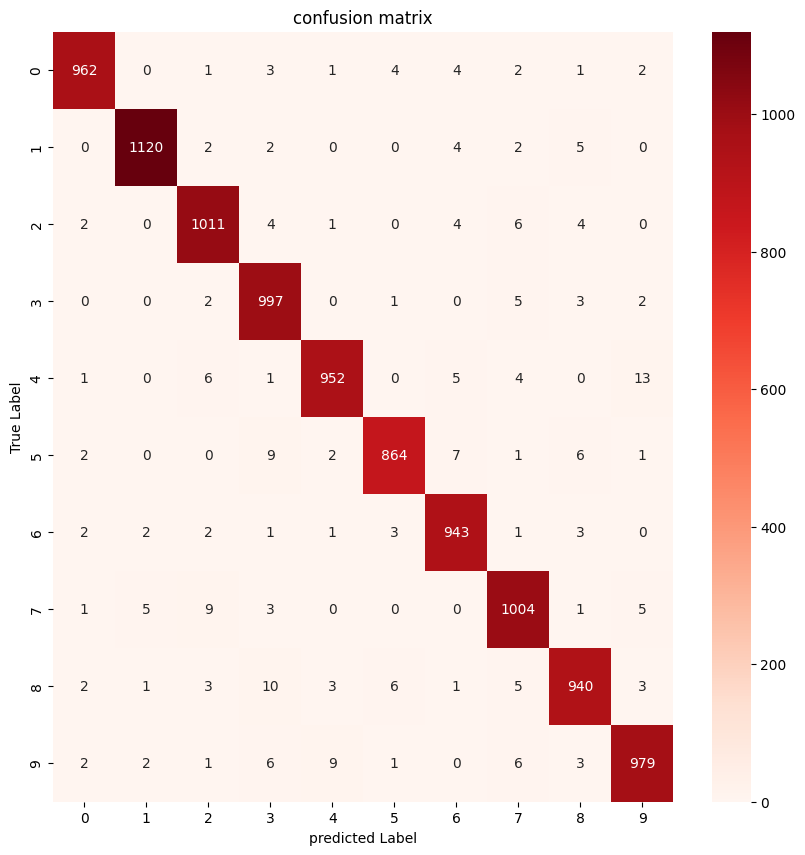

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_prediction_classes)

#plot
figure, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Reds')
ax.set_xlabel("predicted Label")
ax.set_ylabel("True Label")
ax.set_title("confusion matrix");


this confusion matrix shows us how many images we correctly predicted and how many were wrongly classified